In [1]:
#Importing req libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
#Importing keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
np.random.seed(0)

#Loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


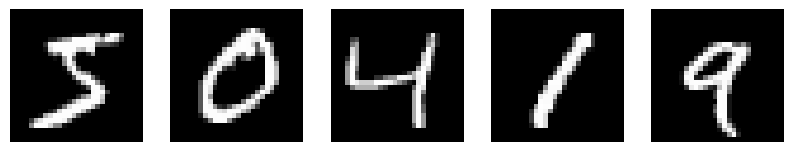

In [3]:
#plotting few random images as black and white
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:

# Defining the model architecture
model = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        # Convolutional layer with 32 filters of size 3x3, using ReLU activation function.
        # Input shape: (28, 28, 1) corresponds to 28x28 grayscale images.

        MaxPool2D((2, 2)),
        # Max pooling layer with pool size 2x2.
        # Reduces the spatial dimensions by taking the maximum value within each 2x2 window.

        Conv2D(64, (3, 3), activation='relu'),
        # Convolutional layer with 64 filters of size 3x3, using ReLU activation function.

        MaxPool2D((2, 2)),
        # Max pooling layer with pool size 2x2.

        Flatten(),
        # Flattens the input from 2D to a 1D array.
        # Necessary before passing the data to a fully connected layer.

        Dense(64, activation='relu'),
        # Fully connected layer with 64 neurons and ReLU activation function.

        Dense(32, activation='relu'),
        # Fully connected layer with 32 neurons and ReLU activation function.

        Dense(10, activation='softmax')
        # Output layer with 10 neurons (corresponding to 10 classes) and softmax activation function.
        # Softmax outputs probabilities for each class, indicating the model's confidence.
    ]
)

# Compiling the model
model.compile(optimizer=Adam(lr=0.04), loss='categorical_crossentropy', metrics=['accuracy'])
# Adam optimizer with learning rate 0.04.
# Categorical cross-entropy loss function is used for multi-class classification.
# Accuracy metric is calculated during training and evaluation.

# Printing the model summary
model.summary()
# Displays a summary of the model architecture, including the number of parameters in each layer,
# as well as the total number of trainable parameters.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [6]:
from keras.callbacks import TensorBoard
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
model.fit(X_train.reshape(-1,28,28,1), to_categorical(y_train), epochs=10, validation_split=0.2,callbacks=[TensorBoard('CNN_logs')])

Epoch 1/10
1200/1200 [==============================] - 14s 4ms/step - loss: 0.3583 - accuracy: 0.9243 - val_loss: 0.1137 - val_accuracy: 0.9683
Epoch 2/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0831 - accuracy: 0.9758 - val_loss: 0.0784 - val_accuracy: 0.9771
Epoch 3/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0570 - accuracy: 0.9828 - val_loss: 0.0572 - val_accuracy: 0.9831
Epoch 4/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0503 - accuracy: 0.9851 - val_loss: 0.0523 - val_accuracy: 0.9856
Epoch 5/10
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0760 - val_accuracy: 0.9783
Epoch 6/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0379 - accuracy: 0.9882 - val_loss: 0.0531 - val_accuracy: 0.9855
Epoch 7/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0302 - accuracy: 0.9910 - val_loss: 0.0641 - val_accuracy

In [7]:
model.evaluate(X_test.reshape(-1,28,28,1), to_categorical(y_test))

375/375 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9852


[0.0714322179555893, 0.9851666688919067]

In [8]:
#confusion matrix
y_pred = model.predict(X_test.reshape(-1,28,28,1))
y_pred = np.argmax(y_pred, axis=1)
y_pred


375/375 [==============================] - 1s 2ms/step


array([3, 6, 6, ..., 5, 1, 6])

In [9]:
print(confusion_matrix(y_test, y_pred))

[[1198    0    1    0    0    0    3    0    2    1]
 [   1 1365    1    1    0    1    1    4    5    0]
 [   1    2 1138    2    0    1    0    8   14    0]
 [   0    1    1 1195    1    3    0    4    3    0]
 [   0    2    3    0 1129    0    3    4    3    9]
 [   3    0    0    2    0 1057    4    1    6    2]
 [   6    1    1    0    1    5 1173    0    3    0]
 [   3    1    1    0    0    0    0 1223    0    0]
 [   1    1    0    0    1    2    0    0 1183    3]
 [   7    1    0    1   13    5    0    7   10 1161]]


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1205
           1       0.99      0.99      0.99      1379
           2       0.99      0.98      0.98      1166
           3       1.00      0.99      0.99      1208
           4       0.99      0.98      0.98      1153
           5       0.98      0.98      0.98      1075
           6       0.99      0.99      0.99      1190
           7       0.98      1.00      0.99      1228
           8       0.96      0.99      0.98      1191
           9       0.99      0.96      0.98      1205

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000

